In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.decomposition import TruncatedSVD

In [2]:
try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None

In [3]:
import numpy as np
import os 


to_remove= ('headers', 'footers', 'quotes')

from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='all', shuffle=True, remove = to_remove)

# Zad

Znajdź najlepszy model dla 20newsgroups wykonując GridSearch dla modeli:

* MultinomialNB (bez redukcji wymiarowości)
* LogisticRegression
* LinearSVC
* SVC
* KNeighborsClassifier
* DecisionTreeClassifier
* RandomForestClassifier
* BaggingClassifier
* ExtraTreesClassifier
* AdaBoostClassifier
* GradientBoostingClassifier
* VotingClassifier
* xgboost.XGBClassifier

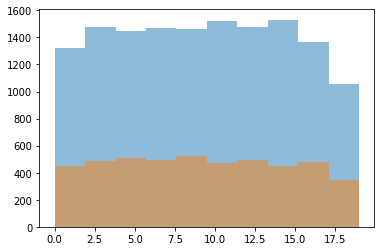

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(newsgroups_train.data, newsgroups_train.target, test_size=0.25, random_state=33)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

In [5]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import MultinomialNB

    
pipe = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB()),
])

param_grid = {
            'vectorizer': [TfidfVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10), 
                           CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)]
}

grid_0 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid_0.fit(X_train, y_train)
grid_0.best_params_


{'vectorizer': TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                 dtype=<class 'numpy.float64'>, encoding='utf-8',
                 input='content', lowercase=True, max_df=0.5, max_features=None,
                 min_df=10, ngram_range=(1, 1), norm='l2', preprocessor=None,
                 smooth_idf=True, stop_words='english', strip_accents='unicode',
                 sublinear_tf=False, token_pattern='\\b[a-zA-Z]{3,}\\b',
                 tokenizer=None, use_idf=True, vocabulary=None)}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

pipe = Pipeline([
    ('vectorizer', CountVectorizer()), 
    ("pca", TruncatedSVD(n_components=10)), 
    ('classifier', LinearSVC(C=1))
])

param_grid = {
            'vectorizer': [TfidfVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10), 
                           CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_1 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
pipe_2 = Pipeline([
    ('vectorizer', CountVectorizer()), 
    ("pca", TruncatedSVD(n_components=10)),
    ('classifier', SVC(C=1, probability=True))
])

param_grid_2 = {
            'vectorizer': [TfidfVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10), 
                           CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)],   
            'classifier__C': [0.01, 0.1, 1, 10, 100,],
            'classifier__gamma': [0.01, 0.1, 1, 10, 100]
}

grid_2 = GridSearchCV(pipe_2, param_grid_2, cv=kfold, return_train_score=True)

grid_2.fit(X_train, y_train)
grid_2.best_params_

In [33]:
from sklearn.linear_model import LogisticRegression

pipe_3 = Pipeline([
    ('vectorizer', CountVectorizer()), 
    ("pca", TruncatedSVD(n_components=10)),
    ('classifier', LogisticRegression(C=1))
])

param_grid_3 = {
            'vectorizer': [TfidfVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10), 
                           CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)],   
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_3 = GridSearchCV(pipe_3, param_grid_3, cv=kfold, return_train_score=True)

grid_3.fit(X_train, y_train)
grid_3.best_params_

{'classifier__C': 100,
 'vectorizer': TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.5, max_features=None, min_df=10,
         ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
         stop_words='english', strip_accents='unicode', sublinear_tf=False,
         token_pattern='\\b[a-zA-Z]{3,}\\b', tokenizer=None, use_idf=True,
         vocabulary=None)}

In [35]:
from sklearn.neighbors import KNeighborsClassifier

pipe_4 = Pipeline([
    ('vectorizer', CountVectorizer()),
    ("pca", TruncatedSVD(n_components=10)),
    ('classifier', KNeighborsClassifier(n_neighbors=2, metric='euclidean'))
])

param_grid_4 = {
            'vectorizer': [TfidfVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10), 
                           CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)],   
            'classifier__n_neighbors': [2, 5, 10],
            'classifier__metric': ['euclidean', 'cityblock', 'cosine']
}


grid_4 = GridSearchCV(pipe_4, param_grid_4, cv=kfold, return_train_score=True)

grid_4.fit(X_train, y_train)
grid_4.best_params_

{'classifier__metric': 'cosine',
 'classifier__n_neighbors': 10,
 'vectorizer': TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.5, max_features=None, min_df=10,
         ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
         stop_words='english', strip_accents='unicode', sublinear_tf=False,
         token_pattern='\\b[a-zA-Z]{3,}\\b', tokenizer=None, use_idf=True,
         vocabulary=None)}

In [37]:
from sklearn.tree import DecisionTreeClassifier

pipe_5 = Pipeline([
    ('vectorizer', CountVectorizer()),
    ("pca", TruncatedSVD(n_components=10)),
    ('classifier', DecisionTreeClassifier())
])

param_grid_5 = {
            'vectorizer': [TfidfVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10), 
                           CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)],    
            'classifier__max_depth': [5,10,20],
            'classifier__min_samples_split': [5,10,20],
            'classifier__max_leaf_nodes': [5,10,20]
}


grid_5 = GridSearchCV(pipe_5, param_grid_5, cv=kfold, return_train_score=True)

grid_5.fit(X_train, y_train)
grid_5.best_params_

{'classifier__max_depth': 20,
 'classifier__max_leaf_nodes': 20,
 'classifier__min_samples_split': 10,
 'vectorizer': TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.5, max_features=None, min_df=10,
         ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
         stop_words='english', strip_accents='unicode', sublinear_tf=False,
         token_pattern='\\b[a-zA-Z]{3,}\\b', tokenizer=None, use_idf=True,
         vocabulary=None)}

In [38]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

pipe_6 = Pipeline([('vectorizer', CountVectorizer()),
                   ("pca", TruncatedSVD(n_components=10)),
                   ('classifier', BaggingClassifier(
                                    DecisionTreeClassifier(random_state=42), n_estimators=500,
                                    max_samples=100, bootstrap=True, random_state=42))
                  ])

param_grid_6 = {
            'vectorizer': [TfidfVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10), 
                           CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)],    
            'classifier__n_estimators': [10,50,100],
            'classifier__max_samples': [10,20]
             }

grid_6 = GridSearchCV(pipe_6, param_grid_6, cv=kfold, return_train_score=True)

grid_6.fit(X_train, y_train)
grid_6.best_params_


{'classifier__max_samples': 20,
 'classifier__n_estimators': 100,
 'vectorizer': TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.5, max_features=None, min_df=10,
         ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
         stop_words='english', strip_accents='unicode', sublinear_tf=False,
         token_pattern='\\b[a-zA-Z]{3,}\\b', tokenizer=None, use_idf=True,
         vocabulary=None)}

In [39]:
from sklearn.ensemble import RandomForestClassifier

pipe_7 = Pipeline([('vectorizer', CountVectorizer()),
                   ("pca", TruncatedSVD(n_components=10)),
                   ('classifier', RandomForestClassifier(n_estimators=500, max_leaf_nodes=16))
                  ])

param_grid_7 = {
            'vectorizer': [TfidfVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10), 
                           CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)],    
            'classifier__n_estimators': [10, 50, 100],
            'classifier__max_leaf_nodes': [10, 20],
            'classifier__max_depth': [10, 20]
             }

grid_7 = GridSearchCV(pipe_7, param_grid_7, cv=kfold, return_train_score=True)

grid_7.fit(X_train, y_train)
grid_7.best_params_

{'classifier__max_depth': 20,
 'classifier__max_leaf_nodes': 20,
 'classifier__n_estimators': 50,
 'vectorizer': TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.5, max_features=None, min_df=10,
         ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
         stop_words='english', strip_accents='unicode', sublinear_tf=False,
         token_pattern='\\b[a-zA-Z]{3,}\\b', tokenizer=None, use_idf=True,
         vocabulary=None)}

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

pipe_8 = Pipeline([('vectorizer', CountVectorizer()), 
                   ("pca", TruncatedSVD(n_components=10)),
                   ('classifier', ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16))
                  ])

param_grid_8 = {
            'vectorizer': [TfidfVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10), 
                           CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)],
                'classifier__n_estimators': [10, 50, 100],
                'classifier__max_leaf_nodes': [10, 20],
                'classifier__max_depth': [10, 20]
             }

grid_8 = GridSearchCV(pipe_8, param_grid_8, cv=kfold, return_train_score=True)

grid_8.fit(X_train, y_train)
grid_8.best_params_

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

pipe_9 = Pipeline([('vectorizer', CountVectorizer()),
                   ("pca", TruncatedSVD(n_components=10)),
                   ('classifier', AdaBoostClassifier(
                        DecisionTreeClassifier(max_depth=1), 
                        n_estimators=1, learning_rate=0.5, 
                        algorithm="SAMME.R", random_state=42)
                   )
                  ])


param_grid_9 = {
            'vectorizer': [TfidfVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10), 
                           CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)],
                'classifier__n_estimators': [50, 100, 200],
                'classifier__learning_rate': [0.1, 0.2,0.5,0.9, 1]
             }

grid_9 = GridSearchCV(pipe_9, param_grid_9, cv=kfold, return_train_score=True)

grid_9.fit(X_train, y_train)
grid_9.best_params_

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

pipe_10 = Pipeline([('vectorizer', CountVectorizer()), 
                    ("pca", TruncatedSVD(n_components=10)),
                   ('classifier', GradientBoostingClassifier(
                       n_estimators=1, 
                      learning_rate=0.5, 
                      random_state=42))
                  ])


param_grid_10 = {
            'vectorizer': [TfidfVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10), 
                           CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)],
                'classifier__n_estimators': [50, 100, 200],
                'classifier__learning_rate': [0.1, 0.2,0.5,0.9, 1]
             }

grid_10 = GridSearchCV(pipe_10, param_grid_10, cv=kfold, return_train_score=True)

grid_10.fit(X_train, y_train)
grid_10.best_params_

In [ ]:
pipe_11 = Pipeline([('vectorizer', CountVectorizer()),
                    ("pca", TruncatedSVD(n_components=10)),
                   ('classifier', xgboost.XGBClassifier(n_estimators=1, 
                      learning_rate=0.5, 
                      random_state=42))
                  ])


param_grid_11 = {
            'vectorizer': [TfidfVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10), 
                           CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)],
                'classifier__n_estimators': [50, 100, 200],
                'classifier__learning_rate': [0.1, 0.2,0.5,0.9, 1]
             }

grid_11 = GridSearchCV(pipe_11, param_grid_11, cv=kfold, return_train_score=True)

grid_11.fit(X_train, y_train)
grid_11.best_params_

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('grid_2', grid_2.best_estimator_), 
                ('grid_3', grid_3.best_estimator_), 
                ('grid_4', grid_4.best_estimator_), 
                ('grid_5', grid_5.best_estimator_), 
                ('grid_6', grid_6.best_estimator_), 
                ('grid_7', grid_7.best_estimator_), 
                ('grid_8', grid_8.best_estimator_), 
                ('grid_9', grid_9.best_estimator_),
                ('grid_10', grid_10.best_estimator_), 
                ('grid_11', grid_11.best_estimator_)
               ],
    voting='soft')
voting_clf.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

estimator = xgboost.XGBClassifier(n_jobs=-1)

pipe_12 = Pipeline([('vectorizer', CountVectorizer()),
                    ("pca", TruncatedSVD(n_components=10)),
                   ('classifier', xgboost.XGBClassifier(n_jobs=-1))
                  ])

param_grid_12 = {
    'vectorizer': [TfidfVectorizer(strip_accents = 'unicode',
                        stop_words = 'english',
                        lowercase = True,
                        token_pattern = r'\b[a-zA-Z]{3,}\b',
                        max_df = 0.5, 
                        min_df = 10), 
                   CountVectorizer(strip_accents = 'unicode',
                        stop_words = 'english',
                        lowercase = True,
                        token_pattern = r'\b[a-zA-Z]{3,}\b',
                        max_df = 0.5, 
                        min_df = 10)],
    'classifier__max_depth': [3, 5, 8, 10],
    'classifier__learning_rate': [0.001, 0.01, 0.05, 0.1],
    'classifier__n_estimators': [50, 100, 150, 200, 400],
    'classifier__gamma': [0, 0.5, 1, 2],
    'classifier__colsample_bytree': [1, 0.8, 0.5],
    'classifier__subsample': [1, 0.8, 0.5],
    'classifier__min_child_weight': [1, 5, 10]
}

grid_12 = RandomizedSearchCV(n_iter=30,estimator=pipe_12, 
                             param_distributions=param_grid_12, 
                      cv=kfold, 
                      return_train_score=True)

grid_12.fit(X_train, y_train)
grid_12.best_params_

In [29]:
from sklearn import  metrics


models = []
models.append(('NB', grid_0.best_estimator_))
models.append(('SVM linear', grid_1.best_estimator_))
# models.append(('SVM rbf', grid_2.best_estimator_))
# models.append(('LR', grid_3.best_estimator_))
# models.append(('KNN', grid_4.best_estimator_))
# models.append(('DecisionTreeClassifier', grid_5.best_estimator_))
# models.append(('BaggingClassifier', grid_6.best_estimator_))
# models.append(('RandomForestClassifier', grid_7.best_estimator_))
# models.append(('ExtraTreesClassifier', grid_8.best_estimator_))
# models.append(('AdaBoostClassifier', grid_9.best_estimator_))
# models.append(('GradientBoostingClassifier', grid_10.best_estimator_))
# models.append(('XGBClassifier', grid_11.best_estimator_))
# models.append(('voting_clf', voting_clf))
# models.append(('XGBClassifier r2', grid_12.best_estimator_))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test , model.predict(X_test), average='weighted') ))
    print("recall_score: {}".format( metrics.recall_score(y_test , model.predict(X_test), average='weighted') ))
    print("f1_score: {}".format( metrics.f1_score(y_test , model.predict(X_test), average='weighted') ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test , model.predict(X_test)) ))
    

    precision_score.append(metrics.precision_score(y_test , model.predict(X_test), average='weighted') )
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test), average='weighted') )
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test), average='weighted') )
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))


NB
precision_score: 0.7255156638785948
recall_score: 0.7043718166383701
f1_score: 0.6947302256516584
accuracy_score: 0.7043718166383701
SVM linear


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


precision_score: 0.3700373476918
recall_score: 0.39282682512733447


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


f1_score: 0.34093662941938446
accuracy_score: 0.39282682512733447


In [30]:
import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['NB', 'SVM linear'])
# df.insert(loc=0, column='Method', value=['NB', 'SVM linear','SVM rbf','LR','KNN','DecisionTreeClassifier','BaggingClassifier','RandomForestClassifier','ExtraTreesClassifier', 'AdaBoostClassifier','GradientBoostingClassifier','XGBClassifier','voting','XGBClassifier r'])
df

,Method,precision_score,recall_score,f1_score,accuracy_score
0,NB,0.725516,0.704372,0.694730,0.704372
1,SVM linear,0.370037,0.392827,0.340937,0.392827


In [7]:
len(X_train)

14134